# Letter image visualisation using PCA

In [55]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import glob
import warnings
warnings.filterwarnings("ignore")
from sklearn.decomposition import PCA
import pandas as pd

## Load Dataset

You can download full dataset here https://www.kaggle.com/c/mashtots-dataset

In [56]:
image_list = []
for filename in glob.iglob("mashtots-dataset" + '**/**', recursive=True):
     if filename.endswith('.png'):
         image_list.append(np.array(Image.open(filename).getdata()))

## Show image example

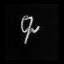

In [57]:
from IPython.display import Image
Image(filename=filename,  width = 200, height = 200)

## Normalise 

In [58]:
image_list = np.array(image_list)
print("image_list shape = ",image_list.shape)
image_mean = np.mean(image_list, axis = 0)
image_std = np.std(image_list, axis = 0).shape
features = (image_list-image_mean)/image_std

image_list shape =  (300, 4096)


## Calculate covarience matrix

In [59]:
cov_matrix = np.cov(features,rowvar=0)
cov_matrix.shape

(4096, 4096)

## Calculate Eigen Values and Eigen Vectors

In [60]:
eigen_values, eigen_vectors = np.linalg.eig(cov_matrix)
sorted_index = np.argsort(eigen_values)[::-1]
sorted_eigenvalue = eigen_values[sorted_index]
sorted_eigenvectors = eigen_vectors[:,sorted_index]
sorted_eigenvectors.shape

(4096, 4096)

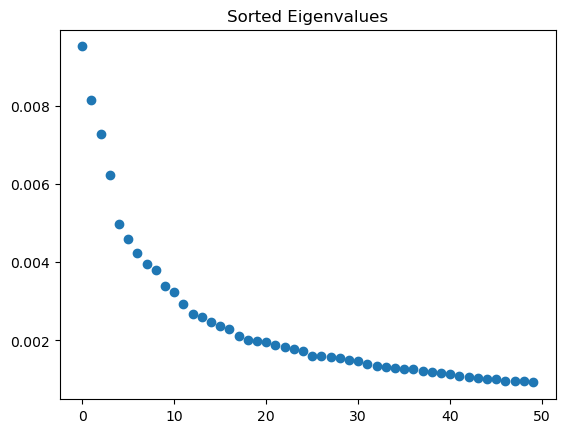

In [61]:
x_point  = list(range(0,len(sorted_eigenvalue[:50])))
plt.title("Sorted Eigenvalues")
plt.scatter(x_point,sorted_eigenvalue[:50])

In [62]:
(sorted_eigenvalue[:80].sum()/sorted_eigenvalue.sum()).astype('float64')

0.8035972844433671

In [63]:
eigenvector_subset = sorted_eigenvectors[:,:2]
X_reduced = np.dot(eigenvector_subset.transpose(), features.transpose()).transpose()
X_reduced.shape

(300, 2)

## Plot the graph

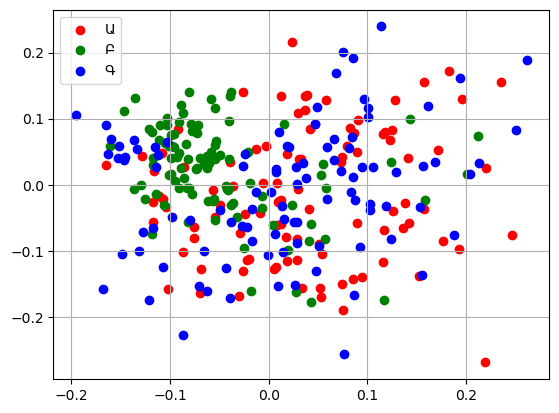

In [64]:
newarr = np.array_split(X_reduced, 3)
fig, ax = plt.subplots()

ax.scatter(newarr[0][:,0],newarr[0][:,1], color = 'r', label = "Ա") # Ա
ax.scatter(newarr[1][:,0],newarr[1][:,1], color = 'g', label = "Բ") # Բ
ax.scatter(newarr[2][:,0],newarr[2][:,1], color = 'b', label = "Գ") # Գ

ax.legend()
ax.grid(True)

plt.show()


## PCA from sklearn

In [75]:
pca = PCA(n_components=2)
pca_transsform = pca.fit_transform(image_list)
pca_transsform.shape

(300, 2)

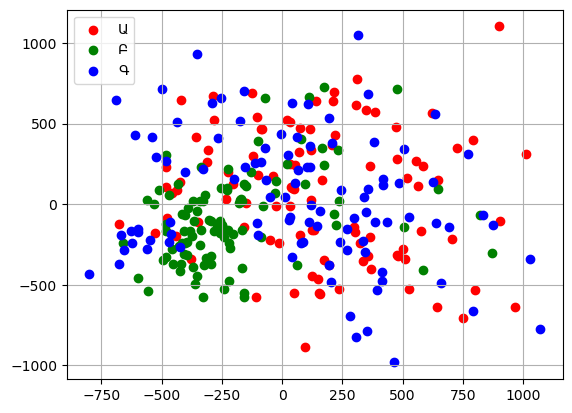

In [76]:
newarr = np.array_split(pca_transsform, 3)
fig, ax = plt.subplots()

ax.scatter(newarr[0][:,0],newarr[0][:,1], color = 'r', label = "Ա") # Ա
ax.scatter(newarr[1][:,0],newarr[1][:,1], color = 'g', label = "Բ") # Բ
ax.scatter(newarr[2][:,0],newarr[2][:,1], color = 'b', label = "Գ") # Գ

ax.legend()
ax.grid(True)

plt.show()